# Task 2a

In [49]:
import math
import nltk
from nltk import *
from nltk.corpus import PlaintextCorpusReader
import matplotlib.pyplot as plt
import numpy as np

## Loading the corpus used for building the lexicon

In [50]:
corpus_for_lexicon = PlaintextCorpusReader("./rt-polaritydata/", ".*", encoding='latin-1')
tagged_corpus = []
#for file in corpus_for_lexicon.fileids():
tagged_corpus = tag.pos_tag(word_tokenize(corpus_for_lexicon.raw()))

print("The size of the corpus is : ",len(tagged_corpus))

The size of the corpus is :  230214


## Loading the initial lexicon

In [51]:
positives = open("positives_adj.txt", "r")
positive_words = []
for line in positives:
    positive_words.append(line.rstrip())
    
print(positive_words)

negatives = open("negatives_adj.txt", "r")
negative_words = []
for line in negatives:
    negative_words.append(line.rstrip())

print(negative_words)

['inspiring', 'exotic', 'good-looking', 'effective', 'gripping', 'thrilling', 'intriguing', 'satisfying', 'entertaining', 'stylish', 'funny', 'emotional', 'naturalistic', 'romantic', 'resonant', 'brilliant', 'absorbing', 'fresh', 'lyrical', 'honest', 'clever']
['silly', 'sour', 'cynical', 'amateurish', 'offensive', 'stupid', 'dishonest', 'r-rated', 'rough', 'unsuccessful', 'unfunny', 'repetitive', 'sappy', 'dull', 'dry', 'mush-hearted', 'predictable', 'creepy', 'neurotic', 'disturbing']


In [52]:
polarity_lexicon = {}
for word in positive_words:
    polarity_lexicon[word] = math.inf

for word in negative_words:
    polarity_lexicon[word] = -math.inf
    
print(polarity_lexicon)

{'inspiring': inf, 'exotic': inf, 'good-looking': inf, 'effective': inf, 'gripping': inf, 'thrilling': inf, 'intriguing': inf, 'satisfying': inf, 'entertaining': inf, 'stylish': inf, 'funny': inf, 'emotional': inf, 'naturalistic': inf, 'romantic': inf, 'resonant': inf, 'brilliant': inf, 'absorbing': inf, 'fresh': inf, 'lyrical': inf, 'honest': inf, 'clever': inf, 'silly': -inf, 'sour': -inf, 'cynical': -inf, 'amateurish': -inf, 'offensive': -inf, 'stupid': -inf, 'dishonest': -inf, 'r-rated': -inf, 'rough': -inf, 'unsuccessful': -inf, 'unfunny': -inf, 'repetitive': -inf, 'sappy': -inf, 'dull': -inf, 'dry': -inf, 'mush-hearted': -inf, 'predictable': -inf, 'creepy': -inf, 'neurotic': -inf, 'disturbing': -inf}


## Implemented patterns

In [53]:
def if_not_pattern(corpus, word_id, polarity, lexicon):
    if_index = word_id + 1
    if if_index < len(corpus) and corpus[if_index][1] in ['(',',',':']:
        if_index += 1
    if if_index + 1 < len(corpus) and corpus[if_index][0] == 'if' and corpus[if_index + 1][0] == 'not':
        rb_id = if_index + 2
        while rb_id < len(corpus) and corpus[rb_id][1] == 'RB':
            rb_id += 1
        if rb_id < len(corpus) and corpus[rb_id][1] == 'JJ':
            if lexicon.get(corpus[rb_id][0]) == None:
                lexicon[corpus[rb_id][0]] = polarity
            else:
                lexicon[corpus[rb_id][0]] += polarity
    rb_id = word_id - 1
    while rb_id >= 0 and corpus[rb_id][1] == 'RB':
        rb_id -= 1
    if rb_id - 1 >= 0 and corpus[rb_id][0] == 'not' and corpus[rb_id - 1] == 'if':
        jj_id = rb_id - 2
        if jj_id >= 0 and corpus[jj_id][1] in ['(',',',':']:
            jj_id -= 1
        if jj_id >= 0 and corpus[jj_id][1] == 'JJ':
            if lexicon.get(corpus[jj_id][0]) == None:
                lexicon[corpus[jj_id][0]] = polarity
            else:
                lexicon[corpus[jj_id][0]] += polarity     

def but_pattern(corpus, word_id, polarity, lexicon):
    but_index = word_id + 1
    if but_index < len(corpus) and corpus[but_index][1] in ['(',',',':']:
        but_index += 1
    if but_index < len(corpus) and corpus[but_index][0] == 'but':
        rb_id = but_index + 1
        while rb_id < len(corpus) and corpus[rb_id][1] == 'RB':
            rb_id += 1
        if rb_id < len(corpus) and corpus[rb_id][1] == 'JJ':
            if lexicon.get(corpus[rb_id][0]) == None:
                lexicon[corpus[rb_id][0]] = polarity
            else:
                lexicon[corpus[rb_id][0]] += polarity
    rb_id = word_id - 1
    while rb_id >= 0 and corpus[rb_id][1] == 'RB':
        rb_id -= 1
    if rb_id >= 0 and corpus[rb_id][0] == 'but':
        jj_id = rb_id - 1
        if jj_id >= 0 and corpus[jj_id][1] in ['(',',',':']:
            jj_id -= 1
        if jj_id >= 0 and corpus[jj_id][1] == 'JJ':
            if lexicon.get(corpus[jj_id][0]) == None:
                lexicon[corpus[jj_id][0]] = polarity
            else:
                lexicon[corpus[jj_id][0]] += polarity 

def and_pattern(corpus, word_id, polarity, lexicon):
    and_index = word_id + 1
    while True:
        if and_index + 1 < len(corpus): 
            if corpus[and_index][0] == ',' or corpus[and_index][0] == 'and':
                and_index += 1
                if corpus[and_index - 1][0] == ',' and corpus[and_index][0] == 'and':
                    and_index += 1
                
                while and_index < len(corpus) and corpus[and_index][1] == 'RB':
                    and_index += 1
                if and_index < len(corpus) and corpus[and_index][1] == 'JJ':
                    if lexicon.get(corpus[and_index][0]) == None:
                        lexicon[corpus[and_index][0]] = polarity
                    else:
                        lexicon[corpus[and_index][0]] += polarity
                else:
                    break
            else:
                break
        else:
            break
    
    and_index = word_id - 1
    
    while True:
        while and_index >= 0 and corpus[and_index][1] == 'RB':
            and_index -= 1
        if and_index - 1 >= 0:
            if corpus[and_index][0] == ',' or corpus[and_index][0] == 'and':
                and_index -= 1
                if corpus[and_index - 1][0] == ',' and corpus[and_index][0] == 'and':
                    and_index -= 1
                if and_index >= 0 and corpus[and_index][1] == 'JJ':
                    if lexicon.get(corpus[and_index][0]) == None:
                        lexicon[corpus[and_index][0]] = polarity
                    else:
                        lexicon[corpus[and_index][0]] += polarity
                else:
                    break
            else:
                break
        else:
            break

In [54]:
def increase_lexicon(corpus, word_id, polarity, lexicon):
    if_not_pattern(corpus, word_id, -polarity, lexicon)
    but_pattern(corpus, word_id, -polarity, lexicon)
    and_pattern(corpus, word_id, polarity, lexicon)

## The bootstrapping process

In [55]:
def bootstrapping(tagged_corpus, positive_words, negative_words):
    global polarity_lexicon
    for i in range(len(tagged_corpus)):
        if tagged_corpus[i][0] in positive_words and tagged_corpus[i][1] == 'JJ':
            increase_lexicon(tagged_corpus, i, 1, polarity_lexicon)
        elif tagged_corpus[i][0] in negative_words and tagged_corpus[i][1] == 'JJ':
            increase_lexicon(tagged_corpus, i, -1, polarity_lexicon)
    
    updated_positive_words = []
    updated_negative_words = []
    neutral = []
    for k, v in polarity_lexicon.items():
        if v > 0:
            updated_positive_words.append(k)
        elif v == 0:
            neutral.append(k)
        else:
            updated_negative_words.append(k)
        
    return updated_positive_words, updated_negative_words, neutral

In [56]:
mpqa = {}
mpqa_file = open("mpqa/subjclueslen1-HLTEMNLP05.tff", "r")
for mpqa_line in mpqa_file:
    line_tokens = mpqa_line.rstrip().split(' ')
    word = line_tokens[2][6:]
    polarity = line_tokens[5][14:]
    mpqa[word] = polarity

In [57]:
num_of_positive_words = [len(positive_words)]
num_of_negative_words = [len(negative_words)]
num_of_neutral_words = [0]

correct = 0
total = num_of_positive_words[len(num_of_positive_words) - 1] + num_of_negative_words[len(num_of_negative_words) - 1] + num_of_neutral_words[len(num_of_neutral_words) - 1]

for word in positive_words:
    if mpqa.get(word) == 'positive':
        correct += 1
for word in negative_words:
    if mpqa.get(word) == 'negative':
        correct += 1
for word in neutral_words:
    if mpqa.get(word) == 'neutral':
        correct += 1
print("Initial correctness: ", 100 * (correct / total))

for i in range(5):
    correct = 0
    total = num_of_positive_words[len(num_of_positive_words) - 1] + num_of_negative_words[len(num_of_negative_words) - 1] + num_of_neutral_words[len(num_of_neutral_words) - 1]

    for word in positive_words:
        if mpqa.get(word) == 'positive':
            correct += 1
    for word in negative_words:
        if mpqa.get(word) == 'negative':
            correct += 1
    for word in neutral_words:
        if mpqa.get(word) == 'neutral':
            correct += 1
    
    
    positive_words, negative_words, neutral_words = bootstrapping(tagged_corpus, positive_words, negative_words)
    num_of_positive_words.append(len(positive_words))
    num_of_negative_words.append(len(negative_words))
    num_of_neutral_words.append(len(neutral_words)) 
    
    print("Iteration ", str(i))
    print("Percentage of correct words: ", 100 * (correct / total))
    print("Lexicon", polarity_lexicon)

    

Initial correctness:  63.41463414634146
Iteration  0
Percentage of correct words:  63.41463414634146
Lexicon {'inspiring': inf, 'exotic': inf, 'good-looking': inf, 'effective': inf, 'gripping': inf, 'thrilling': inf, 'intriguing': inf, 'satisfying': inf, 'entertaining': inf, 'stylish': inf, 'funny': inf, 'emotional': inf, 'naturalistic': inf, 'romantic': inf, 'resonant': inf, 'brilliant': inf, 'absorbing': inf, 'fresh': inf, 'lyrical': inf, 'honest': inf, 'clever': inf, 'silly': -inf, 'sour': -inf, 'cynical': -inf, 'amateurish': -inf, 'offensive': -inf, 'stupid': -inf, 'dishonest': -inf, 'r-rated': -inf, 'rough': -inf, 'unsuccessful': -inf, 'unfunny': -inf, 'repetitive': -inf, 'sappy': -inf, 'dull': -inf, 'dry': -inf, 'mush-hearted': -inf, 'predictable': -inf, 'creepy': -inf, 'neurotic': -inf, 'disturbing': -inf, 'infantile': -1, 'pointless': -2, 'loud': -1, 'inept': -1, 'dependent': -1, 'grainy': -1, 'road-trip': -1, 'feature-length': -1, 'intellectual': 2, 'raucous': -1, 'insistent':

Iteration  2
Percentage of correct words:  39.249146757679185
Lexicon {'inspiring': inf, 'exotic': inf, 'good-looking': inf, 'effective': inf, 'gripping': inf, 'thrilling': inf, 'intriguing': inf, 'satisfying': inf, 'entertaining': inf, 'stylish': inf, 'funny': inf, 'emotional': inf, 'naturalistic': inf, 'romantic': inf, 'resonant': inf, 'brilliant': inf, 'absorbing': inf, 'fresh': inf, 'lyrical': inf, 'honest': inf, 'clever': inf, 'silly': -inf, 'sour': -inf, 'cynical': -inf, 'amateurish': -inf, 'offensive': -inf, 'stupid': -inf, 'dishonest': -inf, 'r-rated': -inf, 'rough': -inf, 'unsuccessful': -inf, 'unfunny': -inf, 'repetitive': -inf, 'sappy': -inf, 'dull': -inf, 'dry': -inf, 'mush-hearted': -inf, 'predictable': -inf, 'creepy': -inf, 'neurotic': -inf, 'disturbing': -inf, 'infantile': -5, 'pointless': -6, 'loud': -16, 'inept': -6, 'dependent': -4, 'grainy': -3, 'road-trip': -3, 'feature-length': -3, 'intellectual': 6, 'raucous': -3, 'insistent': -3, 'sanguine': -3, 'long': -34, 'sub

Iteration  3
Percentage of correct words:  36.58243080625752
Lexicon {'inspiring': inf, 'exotic': inf, 'good-looking': inf, 'effective': inf, 'gripping': inf, 'thrilling': inf, 'intriguing': inf, 'satisfying': inf, 'entertaining': inf, 'stylish': inf, 'funny': inf, 'emotional': inf, 'naturalistic': inf, 'romantic': inf, 'resonant': inf, 'brilliant': inf, 'absorbing': inf, 'fresh': inf, 'lyrical': inf, 'honest': inf, 'clever': inf, 'silly': -inf, 'sour': -inf, 'cynical': -inf, 'amateurish': -inf, 'offensive': -inf, 'stupid': -inf, 'dishonest': -inf, 'r-rated': -inf, 'rough': -inf, 'unsuccessful': -inf, 'unfunny': -inf, 'repetitive': -inf, 'sappy': -inf, 'dull': -inf, 'dry': -inf, 'mush-hearted': -inf, 'predictable': -inf, 'creepy': -inf, 'neurotic': -inf, 'disturbing': -inf, 'infantile': -7, 'pointless': -8, 'loud': -29, 'inept': -10, 'dependent': -6, 'grainy': -4, 'road-trip': -4, 'feature-length': -4, 'intellectual': 8, 'raucous': -4, 'insistent': -4, 'sanguine': -4, 'long': -55, 'sub

Iteration  4
Percentage of correct words:  35.26315789473684
Lexicon {'inspiring': inf, 'exotic': inf, 'good-looking': inf, 'effective': inf, 'gripping': inf, 'thrilling': inf, 'intriguing': inf, 'satisfying': inf, 'entertaining': inf, 'stylish': inf, 'funny': inf, 'emotional': inf, 'naturalistic': inf, 'romantic': inf, 'resonant': inf, 'brilliant': inf, 'absorbing': inf, 'fresh': inf, 'lyrical': inf, 'honest': inf, 'clever': inf, 'silly': -inf, 'sour': -inf, 'cynical': -inf, 'amateurish': -inf, 'offensive': -inf, 'stupid': -inf, 'dishonest': -inf, 'r-rated': -inf, 'rough': -inf, 'unsuccessful': -inf, 'unfunny': -inf, 'repetitive': -inf, 'sappy': -inf, 'dull': -inf, 'dry': -inf, 'mush-hearted': -inf, 'predictable': -inf, 'creepy': -inf, 'neurotic': -inf, 'disturbing': -inf, 'infantile': -9, 'pointless': -10, 'loud': -42, 'inept': -14, 'dependent': -8, 'grainy': -5, 'road-trip': -5, 'feature-length': -5, 'intellectual': 10, 'raucous': -5, 'insistent': -5, 'sanguine': -5, 'long': -76, 's

## Number of positive, negative and neutral words in the lexicon

In [58]:
print("Number of positive words: ",num_of_positive_words)
print("Number of negative words: ",num_of_negative_words)
print("Number of neutral words: ",num_of_neutral_words)

Number of positive words:  [21, 140, 331, 500, 575, 602]
Number of negative words:  [20, 112, 235, 317, 360, 374]
Number of neutral words:  [0, 6, 20, 14, 15, 15]


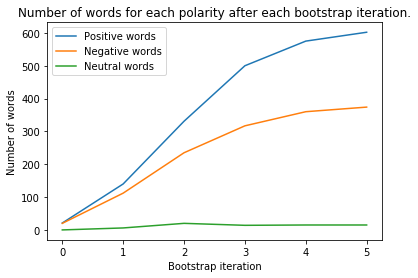

In [59]:
plt.plot(np.arange(0,6),num_of_positive_words, label = "Positive words")
plt.plot(np.arange(0,6),num_of_negative_words, label = "Negative words")
plt.plot(np.arange(0,6),num_of_neutral_words, label = "Neutral words")
plt.title("Number of words for each polarity after each bootstrap iteration.")
plt.xlabel("Bootstrap iteration")
plt.ylabel("Number of words")
plt.legend()
plt.show()

## Correct words

In [60]:
correct = 0
total = num_of_positive_words[len(num_of_positive_words) - 1] + num_of_negative_words[len(num_of_negative_words) - 1] + num_of_neutral_words[len(num_of_neutral_words) - 1]

for word in positive_words:
    if mpqa.get(word) == 'positive':
        correct += 1
for word in negative_words:
    if mpqa.get(word) == 'negative':
        correct += 1
for word in neutral_words:
    if mpqa.get(word) == 'neutral':
        correct += 1
        
print("Final percentage of correct words: ", 100 * (correct / total))

Final percentage of correct words:  35.01513622603431
